<a href="https://colab.research.google.com/github/luislauriano/data_science/blob/master/An%C3%A1lise_coronav%C3%ADrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos dados do Coronavírus**

O novo coronavírus de 2019 (2019-nCoV) é um vírus (mais especificamente, um coronavírus) identificado como a causa de um surto de doença respiratória detectado pela primeira vez em Wuhan, China. No início, muitos dos pacientes do surto em Wuhan, na China, teriam algum vínculo com um grande mercado de frutos do mar e animais, sugerindo a disseminação de animais para pessoas. No entanto, um número crescente de pacientes supostamente não teve exposição ao mercado de animais, indicando a ocorrência de disseminação de pessoa para pessoa. 

# **Obtenção de dados**

Este dataset foi retirado do [kaggle.com](https://) e disponibilizado pela Johns Hopkins University. O conjunto de dados possui informações diárias sobre o número de casos afetados, mortes e recuperação do novo coronavírus de 2019. Observe que esses são dados de séries temporais e, portanto, o número de casos em um determinado dia é o número acumulado. Disponibilizado pela Johns Hopkins University que criou um excelente painel usando os dados de casos afetados. 

**Os dados analisados vão do dia 22/01/2020 ao 09/03/2020**

 **Informações sobre os atributos**

* Sno - número de série
* ObservationDate - Data da observação em MM / DD / AAAA
* Province/State - Província ou estado da observação (pode estar vazio quando estiver ausente)
* Country/Region - país de observação
* Last Update- Horário no UTC em que a linha é atualizada para a província ou país em questão. (Não padronizado e, portanto, limpe antes de usá-lo)
* Confirmed - número acumulado de casos confirmados até essa data
* Deaths - Número acumulado de óbitos até essa data
* Recovered - Número acumulado de casos recuperados até essa data

**Importar os dados**

> Nesta etapa inicial importaremos o dataset mencionado anteriormente e as bibliotecas que iremos utilizar

In [0]:
#Importar bibliotecas necessárias 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 



#Setar o estilo do seaborn
sns.set(style="darkgrid")

#Importar o dataset do covid-19
df = pd.read_csv('https://raw.githubusercontent.com/luislauriano/data_science/master/data/covid_19_data.csv')

#Importar um segundo dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/luislauriano/data_science/master/data/covid_19_data%20(1).csv')

# **Análise inicial dos dados**

> O objetivo desta etapa é criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. Para facilitar a nossa análise. 

Como de costume de toda e qualquer análise de dados, vamos verificar a cara do nosso dataset e já termos uma noção de com oque vamos trabalhar.

In [0]:
#Apresentar as primeiras linhas do dataset
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Já que o nosso dataset possui apenas oito colunas, vamos aproveitar isso para renomear as colunas para português, facilitando o entendimento.






In [0]:
#Renomeando as colunas para português
df.columns = ['Nº de série', 'data_da_observaçao', 'provincia_ou_estado', 'país', 'ultima_atualizaçao', 'casos_confirmados', 'casos_mortes', 'casos_recuperados' ]

df2.columns = ['Nº de série', 'data_da_observaçao', 'provincia_ou_estado', 'país', 'ultima_atualizaçao', 'casos_confirmados', 'casos_mortes', 'casos_recuperados' ]

#As primeiras linhas do dataset novamente
df.head()

,Nº de série,data_da_observaçao,provincia_ou_estado,país,ultima_atualizaçao,casos_confirmados,casos_mortes,casos_recuperados
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Vamos finalizar essa análise inicial verificando quais são as últimas linhas do nosso dataset.

In [0]:
#As últimas linhas do dataset
df.tail()

,Nº de série,data_da_observaçao,provincia_ou_estado,país,ultima_atualizaçao,casos_confirmados,casos_mortes,casos_recuperados
4508,4509,03/09/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0
4509,4510,03/09/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4510,4511,03/09/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4511,4512,03/09/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4512,4513,03/09/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


# **Preparação dos dados** 

> Abaixo será apresentado a análise dos dados do dataset, que embasará a conclusão do estudo.

**Qual o tamanho e tipo dos atributos do dataset?**

In [0]:
#Tamanho do dataset 
print(f'Nº de Linhas: {df.shape[0]}')
print(f'Nº de Colunas: {df.shape[1]}')

#Tipo das variáveis
df.dtypes.sort_values(ascending=False)

Nº de Linhas: 4513
Nº de Colunas: 8


ultima_atualizaçao      object
país                    object
provincia_ou_estado     object
data_da_observaçao      object
casos_recuperados      float64
casos_mortes           float64
casos_confirmados      float64
Nº de série              int64
dtype: object

Se observarmos, foi verificado que nosso dataset possui 4513 linhas, 8 colunas e suas variáveis em sua maioria são do tipo objeto. 

> A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes, por isso, sempre devemos verificar a quantidade de valores ausentes presentes em nosso dataset.

**Algum atributo possue valores ausentes?**

In [0]:
#Verificando valores ausentes do df (isnull().sum())
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

provincia_ou_estado    0.354753
casos_recuperados      0.000000
casos_mortes           0.000000
casos_confirmados      0.000000
ultima_atualizaçao     0.000000
país                   0.000000
data_da_observaçao     0.000000
Nº de série            0.000000
dtype: float64

Podemos observar que o atributo **provincia_ou_estado** tem aproximadamente 0.3% dos valores ausentes, enquantos os outros atibutos não apresentam valores ausentes. 

De acordo com a documentação dos dados, caso viessem nulos é por que a informação foi perdida.

Se quiséssemos excluir os dados ausentes do atributo **provincia_ou_estado**, poderiamos utilizar o comando dropna e verificar os valores ausentes novamente. Como abaixo.

In [0]:
#Excluindo valores ausentes ('dropna')
df.dropna(inplace=True)

In [0]:
#Ver valores ausentes novamente
((df.isnull().sum() / df.shape[0])).sort_values(ascending=False)

provincia_ou_estado    0.354753
casos_recuperados      0.000000
casos_mortes           0.000000
casos_confirmados      0.000000
ultima_atualizaçao     0.000000
país                   0.000000
data_da_observaçao     0.000000
Nº de série            0.000000
dtype: float64

Agora o atributo **provincia_ou_estado** nao obteria mais valores ausentes.

**Qual o período em que os dados estão sendo analisados?** 

Por se tratar de um vírus que está crescendo todos os dias e tornando-se uma pandemia, precisamos saber qual o período que estamos analisando. 

In [0]:
#Data de inicio e fim
print('Início: ', df.data_da_observaçao.min())
print('Fim: ', df.data_da_observaçao.max())

Início:  01/22/2020
Fim:  03/09/2020


Pra finalizar, abaixo temos o resumo do nosso dataset

In [0]:
#Resumo do nosso dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 8 columns):
Nº de série            4513 non-null int64
data_da_observaçao     4513 non-null object
provincia_ou_estado    2912 non-null object
país                   4513 non-null object
ultima_atualizaçao     4513 non-null object
casos_confirmados      4513 non-null float64
casos_mortes           4513 non-null float64
casos_recuperados      4513 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 282.2+ KB


# **Análise exploratória dos casos do coronavirus**

> Depois de uma preparação e tratamento dos dados do nosso dataset, podemos partir para os objetivos desse projeto e começar a explorar os dados.  

O objetivo dessa etapa e das que estão por vim é analisar e extrair informações sobre o coronavirus com base no nosso dataset.



**Quais são os países afetados pelo novo vírus?**


In [0]:
# Mostrar os países afetados
print(f'Os países afetados pelo novo vírus são: {df.país.unique()}')

Os países afetados pelo novo vírus são: ['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibr

In [0]:
# Total de países afetados 

print(f'Ao total foram: {len(df.país.unique())} países afetados')

Ao total foram: 115 países afetados


**Quais países foram mais afetados?**

In [0]:
#Os países que mais foram afetados
df.groupby('país')['casos_confirmados', 'casos_mortes', 'casos_recuperados'].max().sort_values(by=['casos_confirmados','casos_mortes','casos_recuperados'], ascending = False)[:20]

,casos_confirmados,casos_mortes,casos_recuperados
país,,,
Mainland China,67743.0,3008.0,46488.0
Italy,9172.0,463.0,724.0
South Korea,7478.0,53.0,135.0
Iran,7161.0,237.0,2394.0
France,1209.0,19.0,12.0
Germany,1176.0,2.0,18.0
Spain,1073.0,28.0,32.0
Others,706.0,6.0,40.0
Japan,511.0,17.0,76.0


É possivel identificar que a China lidera os países com o maior número de casos confirmados e de mortes, em seguida Hong Kong e em terceiro Japão. O fato da China apresentar um alto índice está diretamente relacionado ao país ter sido o berço do vírus.

Se analisarmos o fato de que o ultimo em que foi registrado casos nesse dataset foi o dia **09/03**, podemos observar que também foi o dia em que o Canadá apresentou o seu segundo caso de morte pelo coronavírus de acordo com as noticias e já conseguimos observar isso na análise.

Também é possivel identificar: 
* Até o momento os Estados Unidos, França e Coreia do Sul apresentam um maior número de casos de mortes do que casos recuperados
* A China tem mais da metade de seus casos confirmados, recuperados


> Vamos criar um gráfico de barra para visualizar melhor os casos do coronavírus por país

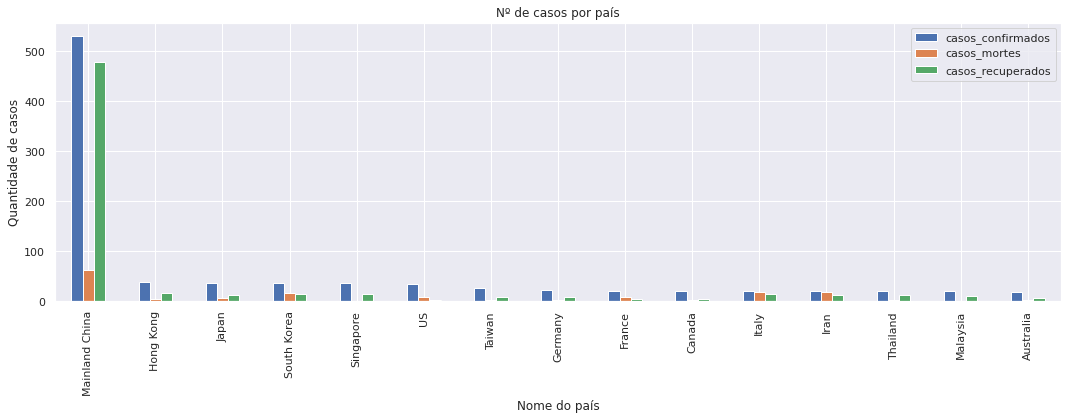

In [0]:
#Gráfico de barra dos casos do coronavirus por país
casos = (df.groupby('país')['casos_confirmados','casos_mortes','casos_recuperados'].nunique().sort_values(by=['casos_confirmados','casos_mortes','casos_recuperados'], ascending = False))[:15]
fig, ax = plt.subplots(figsize=(15,6))

casos.plot(kind='bar', ax=ax)
ax.set_title('Nº de casos por país')
ax.set_ylabel('Quantidade de casos')
ax.set_xlabel('Nome do país')
plt.tight_layout()

Nota-se que a China se destaca quando comparada aos outros países. Porém, este dataset vai do dia **22/01** até o dia **09/03** e é possivel observar que a China apresenta um maior número de casos recuperados do que casos de mortes. Talvez, se o dataset fosse coletado a um ou dois meses atrás, o gráfico fosse diferente e a China apresentasse um maior número de mortes do que casos recuperados.

É possivel indentificar que os países Coreia do Sul, Estados Unidos, França, Itália e Iran, estão passando pelo pico do vírus e assim apresentam um número maior de casos de mortes do que casos recuperados.

**Evolução do coronavirus** 

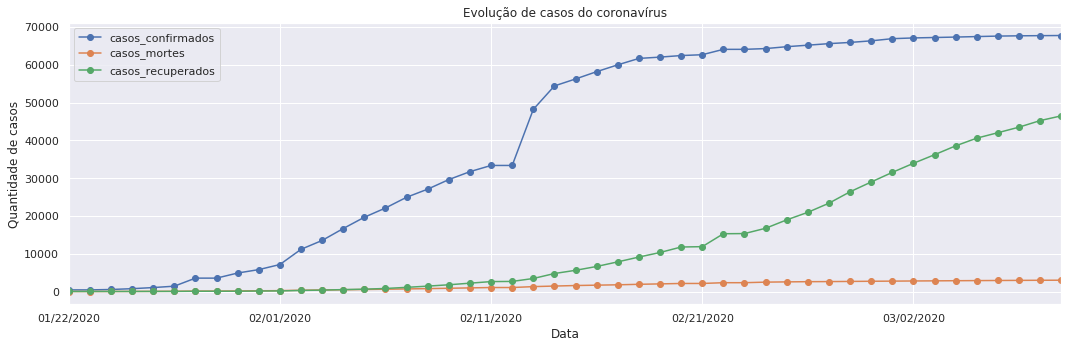

In [0]:
#Evolução dos casos do coronavirus 
evoluçao = df.groupby('data_da_observaçao')['casos_confirmados', 'casos_mortes', 'casos_recuperados'].max()

fig, ax = plt.subplots(figsize = (15,5))

evoluçao.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução de casos do coronavírus')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.tight_layout()



É possivel observar que até o dia **11/02** aproximadamente um mês atrás (levando em consideração que estou escrevendo no dia 11/03) o número de casos de mortes e recuperados cresciam na mesma proporção. 

Porém, a partir do dia **21/02** o número de casos recuperados já apresentava uma boa diferença do número de casos de mortes e até o momento o número de casos de mortes tem mantido estabilizado, distante do número de casos recuperados.  

# **Estados Unidos, preocupante?**

Como mostrado anteriormente, nos Estados Unidos tem crescido o número de casos confirmados pelo coronavírus, porém, o número de casos de mortes é maior do que casos recuperados em relação aos casos confirmados. Isto acontece devido ao pico de quando o vírus se choca com o país, oque deve acontecer em cada país afetado pelo vírus. 

Por isso, vamos agora visualizar melhor a evolução do vírus no país.

In [0]:
#Extraindo o país Estados Unidos da coluna País
eua = df.loc[df['país'] == 'US']

eua.head() 

,Nº de série,data_da_observaçao,provincia_ou_estado,país,ultima_atualizaçao,casos_confirmados,casos_mortes,casos_recuperados
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0


Agora que já temos todos os valores dos Estados Unidos, vamos visualizar como foi a evolução do coronavirus no país no periodo do dia **22/01 ao 09/03**.

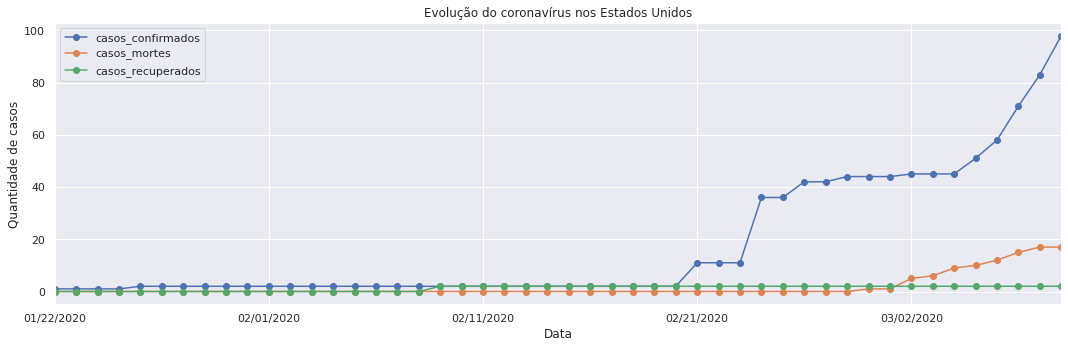

In [0]:
#Gráfico de linhas para visualizar a evolução de casos na China
evolucao_EUA = eua.groupby('data_da_observaçao')['casos_confirmados', 'casos_mortes', 'casos_recuperados'].max()

fig, ax = plt.subplots(figsize = (15,5))

evolucao_EUA.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução do coronavírus nos Estados Unidos') 
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.tight_layout()

É possível identificar que a crescente de casos confirmados no páis se iniciou a partir do dia **21/02** e desde então tem aumentado.

Também é possível identificar que o número de casos recuperados e de casos de mortes nunca apresentaram uma larga diferença, entretanto, a partir do dia **02/03** o número de casos de mortes tem crescido mais do que o número de casos recuperados.

**Qual a porcentagem de casos de mortes e recuperados sobre os casos confirmados?**

In [0]:
print(f'Porcentagem de Casos de Mortes: {(eua["casos_mortes"].max() / eua["casos_confirmados"].max())*100}')

Porcentagem de Casos de Mortes: 17.346938775510203


In [0]:
print(f'Porcentagem de Casos Recuperados: {(eua["casos_recuperados"].max() / eua["casos_confirmados"].max())*100}')

Porcentagem de Casos Recuperados: 2.0408163265306123


# **Analisando os dados da China**

In [0]:
#Extraindo os valores de China da coluna País
china = df.loc[df['país'] == 'Mainland China']

china.head() 

,Nº de série,data_da_observaçao,provincia_ou_estado,país,ultima_atualizaçao,casos_confirmados,casos_mortes,casos_recuperados
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


> Agora vamos criar um gráfico para visualizar como foi a evolução do caso do coronavirus na China no periodo do dia **22/01 ao 09/03**

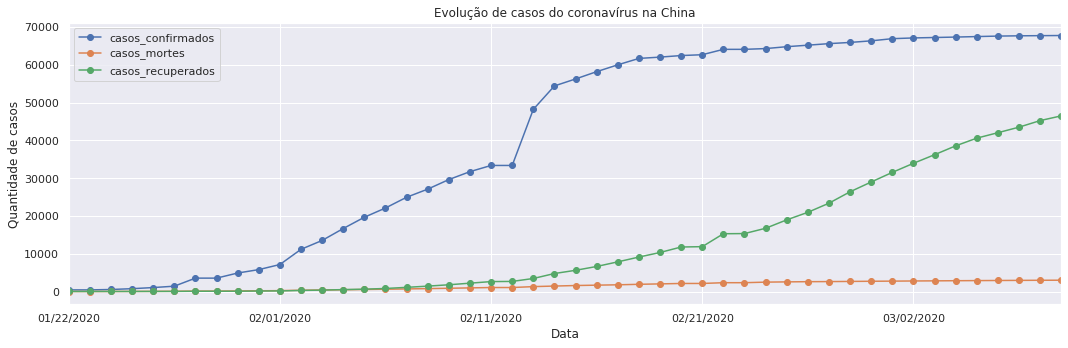

In [0]:
#Gráfico de linhas para visualizar a evolução de casos na China
evolucao_china = china.groupby('data_da_observaçao')['casos_confirmados', 'casos_mortes', 'casos_recuperados'].max()

fig, ax = plt.subplots(figsize = (15,5))

evolucao_china.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução de casos do coronavírus na China')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.tight_layout()

Diferente dos Estados Unidos, podemos observar que a China já passou pelo seu pico do coronavírus e hoje já se encontra mais estabilizada, com o número de casos confirmados maior do que o número de mortes. 

É possível identificar que mesmo que o número de casos confirmados tenha tido um alto crescimento, aproximadamente a partir do dia **12/02**, o número de casos recuperados também cresceu proporcionalmente e no dia **21/02** o número de casos recuperados já apresentava um boa diferença do número de casos de mortes.

**Quais foram as provincias/estado da China que mais foram afetados?**

In [0]:
#Províncias ou estados da China que mais foram afetados
china.groupby('provincia_ou_estado')['casos_confirmados','casos_mortes','casos_recuperados'].max().sort_values(by='casos_confirmados', ascending = False)[:10]

,casos_confirmados,casos_mortes,casos_recuperados
provincia_ou_estado,,,
Hubei,67743.0,3008.0,46488.0
Guangdong,1352.0,8.0,1260.0
Henan,1272.0,22.0,1247.0
Zhejiang,1215.0,1.0,1176.0
Hunan,1018.0,4.0,979.0
Anhui,990.0,6.0,984.0
Jiangxi,935.0,1.0,923.0
Shandong,758.0,6.0,700.0
Jiangsu,631.0,0.0,621.0


> Vamos criar um grafico para visualizar melhor essas províncias ou estados que foram afetados 

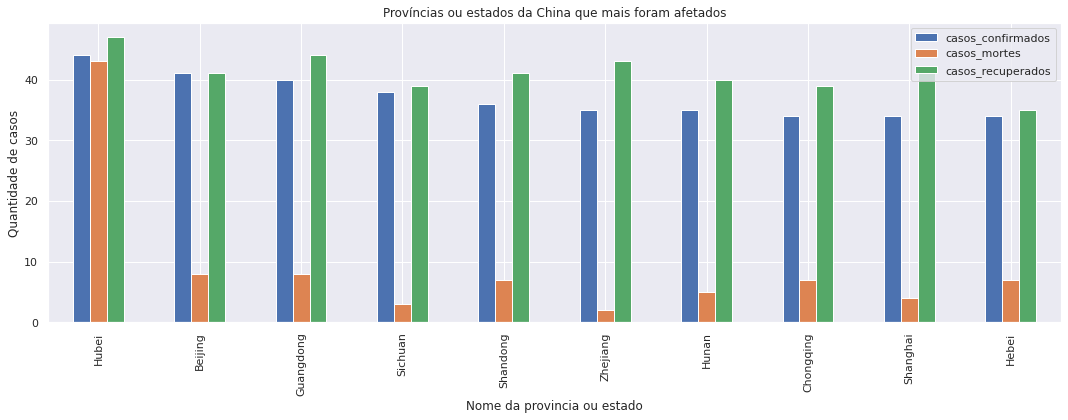

In [0]:
#Gráfico de barra para as provincias ou estados da China que mais foram afetados
provincia_estado = china.groupby('provincia_ou_estado')['casos_confirmados','casos_mortes','casos_recuperados'].nunique().sort_values(by='casos_confirmados', ascending = False)[:10]

fig, ax = plt.subplots(figsize=(15,6))

provincia_estado.plot(kind='bar', ax=ax)
ax.set_title('Províncias ou estados da China que mais foram afetados')
ax.set_ylabel('Quantidade de casos')
ax.set_xlabel('Nome da provincia ou estado')
plt.tight_layout()

Nota-se que em sua maioria a China conta com estados ou províncias com maior número de casos recuperados do que de casos confirmados e com uma larga diferença dos casos de mortes. 


**Qual a porcentagem de mortos sobre os casos confirmados?**

In [0]:
print(f'Porcentagem de Casos de Mortes: {(china["casos_mortes"].max() / china["casos_confirmados"].max())*100}')

Porcentagem de Casos de Mortes: 4.440311176062471


In [0]:
print(f'Porcentagem de Casos Recuperados: {(china["casos_recuperados"].max() / china["casos_confirmados"].max())*100}')

Porcentagem de Casos Recuperados: 68.62406447898675


# **Analisando os dados do Brasil**

Como já dito anteriormente, o registro de dados no nosso dataset se inicia no dia **22/01** e se encerra no dia que eu o coletei, **09/03**.

Porém, a partir dos dias **09/03** e **08/03** o Brasil começou a iniciar oque poderíamos chamar de pico do coronavírus, aumentando o seu número de casos confirmados. Então, resolvi coletar um novo dataset no dia **13/03** e compararmos o crescimento do vírus em nosso país.

In [0]:
#Extraindo valores do Brasil da coluna País do df 22/01 ao 09/03
brasil = df.loc[df['país'] == 'Brazil']

brasil.head() 

,Nº de série,data_da_observaçao,provincia_ou_estado,país,ultima_atualizaçao,casos_confirmados,casos_mortes,casos_recuperados
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0


In [0]:
#Extraindo valores do Brasil da coluna País do df2 22/01 ao 11/03
brasil2 = df2.loc[df2['país'] == 'Brazil']

brasil2.head() 

,Nº de série,data_da_observaçao,provincia_ou_estado,país,ultima_atualizaçao,casos_confirmados,casos_mortes,casos_recuperados
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0,0,0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1,0,0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1,0,0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1,0,0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2,0,0


**Brasil 22/01 ao 09/03**

In [0]:
#Data de inicio e fim
print('Início: ', df.data_da_observaçao.min())
print('Fim: ', df.data_da_observaçao.max())

Início:  01/22/2020
Fim:  03/09/2020


Nota-se que este dataset se inicia no dia 22/01 e termina no dia **09/03**. 

Vamos visualizar como foi o crescimento do vírus no país até essa data, abaixo.

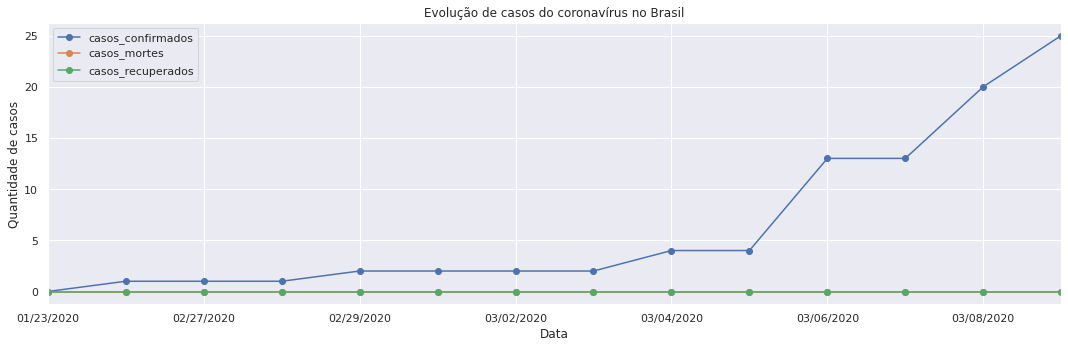

In [0]:
evolucao_brasil = brasil.groupby('data_da_observaçao')['casos_confirmados', 'casos_mortes', 'casos_recuperados'].max()

fig, ax = plt.subplots(figsize = (15,5))

evolucao_brasil.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução de casos do coronavírus no Brasil')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.tight_layout()

**Brasil 22/01 ao 11/03**

In [0]:
#Data de inicio e fim
print('Início: ', df2.data_da_observaçao.min())
print('Fim: ', df2.data_da_observaçao.max())

Início:  01/22/2020
Fim:  03/11/20


Fica claro que o nosso segundo dataset, o **df2**, termina os seus registros de dados no dia **11/03**.

Agora vamos comparar como foi o crescimento do vírus no páis do dia **08/03** ao dia **11/03**, abaixo.

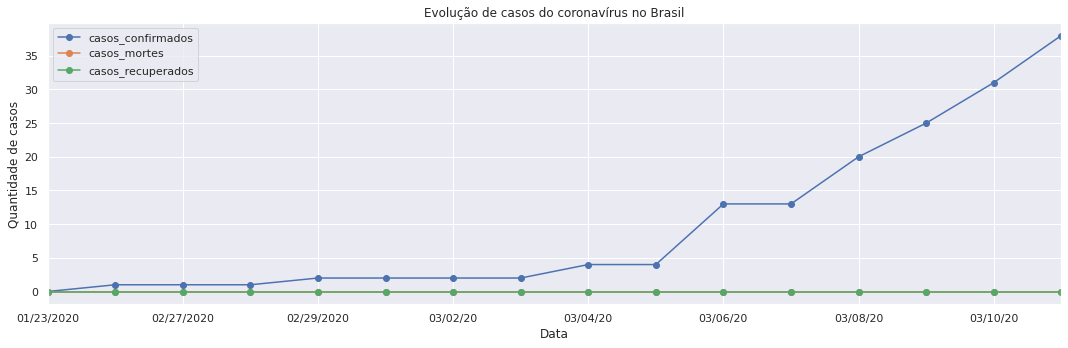

In [0]:
evolucao_brasil2 = brasil2.groupby('data_da_observaçao')['casos_confirmados', 'casos_mortes', 'casos_recuperados'].max()

fig, ax = plt.subplots(figsize = (15,5))

evolucao_brasil2.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução de casos do coronavírus no Brasil')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
plt.tight_layout()

Se analisarmos e compararmos com calma os dois gráficos que mostram a evolução do coronavírus no Brasil. Podemos identificar que do dia **08/03** ao dia **11/03** o país teve um crescimento aproximado de mais de 20 casos confirmados.

# **Conclusão**

O que se pode concluir é que cada país vai passar por um pico do vírus e a forma de como as autoridades do país vão responder, está claramente ligada ao número de casos confirmados, casos de mortes e casos recuperados que o país irá apresentar. 

Na análise feita foi identificado que a China já apresenta um número maior de casos recuperados do que de casos de mortes. Países como Estados Unidos, França, Coreia do Sul e Irã estão entrando no pico do vírus, apresentando um número maior de casos de mortes do que de casos recuperados. Países como Brasil e Canadá começaram a ter seus primeiros grandes choques com o vírus. Lembra-se que essa análise foi baseada em uma base de dados disponibilizada pela Johns Hopkins University. 